#PART 1

📋 Objective:
This project aims to analyze the electricity consumption patterns, appliance ownership, and financial struggles of low-income households in Bulacan — specifically those earning less than PHP 21,194 per month. Using SQL and Python (Pandas, Matplotlib), we explore correlations between income, household composition, students at home, and electricity affordability.

1. Import the libraries

In [ ]:
import pandas as pd
import sqlite3

2. Import the csv file 'Survey.csv' into df

In [ ]:
df=pd.read_csv('Survey.csv')
df.columns

Index(['Timestamp', 'Name', 'Age', 'Sex', 'Mobile Number (09xxxxxxxxx):',
       'Are you from Bulacan?',
       'Do you live with an extended family (with grandmother/aunt/and such)?',
       'How many members are currently living in your house/household?',
       'Are there students in your household?',
       'How many members of your household contribute to the bills?',
       'How much is your household’s accumulated salary per month?',
       'Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship)',
       'How much is your household’s budget for electricity each month?',
       'Please tick if you own these appliances (choose all possible)',
       'Month A', 'Month B', 'Month C', 'How much?', 'How often?',
       'How many? (Students in your household)',
       'Do they use any of the following? (choose as many)',
       'Choose among the following: [How often do you struggle in finding money to 

In [ ]:
df['How much is your household’s budget for electricity each month?'].mean()

np.float64(2764.473214285714)

In [ ]:
df1=df.copy()

In [ ]:
df['avg_bill']=(df['Month A']+df['Month B']+df['Month C'])/3

In [ ]:
df.avg_bill.mean()

np.float64(3430.0)

In [ ]:
df

,Timestamp,Name,Age,Sex,Mobile Number (09xxxxxxxxx):,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,...,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,2022/05/11 8:37:38 PM GMT+8,NaN,21.0,Male,NaN,Yes,No,5.0,Yes,2.0,...,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Higher than Php3000,Monthly,2,Laptop;Smart Phone,Sometimes,Sometimes
1,2022/05/11 8:37:55 PM GMT+8,NaN,20.0,Male,NaN,Yes,No,3.0,Yes,3.0,...,Air Conditioner;Desktop Computer;Rice Cooker,2500.0,3004,2752,NaN,NaN,2,Laptop;Desktop Computer;Smart Phone,Never,Never
2,2022/05/11 8:40:50 PM GMT+8,NaN,21.0,Male,NaN,Yes,No,5.0,Yes,3.0,...,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
3,2022/05/11 8:44:20 PM GMT+8,NaN,20.0,Male,NaN,Yes,No,6.0,Yes,2.0,...,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
4,2022/05/11 8:57:26 PM GMT+8,NaN,20.0,Female,NaN,Yes,No,4.0,Yes,2.0,...,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,NaN,NaN,2,Laptop;Tablet;Smart Phone,Sometimes,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2022/05/16 1:11:06 PM GMT+8,NaN,22.0,Female,NaN,Yes,Yes,6.0,Yes,3.0,...,Air Conditioner;TV;Refrigerator;Washing Machin...,2500.0,3004,2752,Higher than Php3000,Monthly,2,Laptop;Tablet;Smart Phone,Never,Never
112,2022/05/16 6:48:32 PM GMT+8,NaN,19.0,Male,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,504,252,NaN,NaN,NaN,NaN,NaN,NaN
113,2022/05/11 10:41:55 PM GMT+8,NaN,151.0,Female,NaN,Yes,Yes,7.0,Yes,4.0,...,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,NaN,NaN,2,Laptop;Smart Phone,Sometimes,Sometimes
114,2022/05/12 9:41:53 AM GMT+8,NaN,2.0,Female,NaN,Yes,No,7.0,Yes,2.0,...,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,NaN,NaN,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes


3. Connect to a database, name the database 'Survey_Database.db'

In [ ]:
conn=sqlite3.connect('Survey_Database.db')

4. Add your dataframe to the database. Name the table 'Initial_Table'

In [ ]:
df.to_sql('Initial_Table',conn,if_exists='replace',index=False)

116

5. Check column names

In [ ]:
q2=''' PRAGMA table_info(Initial_table)'''
columns=pd.read_sql_query(q2,conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,Timestamp,TEXT,0,None,0
1,1,Name,REAL,0,None,0
2,2,Age,REAL,0,None,0
3,3,Sex,TEXT,0,None,0
4,4,Mobile Number (09xxxxxxxxx):,REAL,0,None,0
5,5,Are you from Bulacan?,TEXT,0,None,0
6,6,Do you live with an extended family (with gran...,TEXT,0,None,0
7,7,How many members are currently living in your ...,REAL,0,None,0
8,8,Are there students in your household?,TEXT,0,None,0
9,9,How many members of your household contribute ...,REAL,0,None,0


6. Query: Make a table 'Initial_Table2' without the columns, timestamp, name, mobile number.

In [ ]:
df[['Age', 'Sex',
       'Are you from Bulacan?',
       'Do you live with an extended family (with grandmother/aunt/and such)?',
       'How many members are currently living in your house/household?',
       'Are there students in your household?',
       'How many members of your household contribute to the bills?',
       'How much is your household’s accumulated salary per month?',
       'Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship)',
       'How much is your household’s budget for electricity each month?',
       'Please tick if you own these appliances (choose all possible)',
       'Month A', 'Month B', 'Month C', 'How much?', 'How often?',
       'How many? (Students in your household)',
       'Do they use any of the following? (choose as many)',
       'Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]',
       'Choose among the following: [How often do you fail to pay the monthly electric bill?]']].to_sql('Initial_Table2',conn,if_exists='replace',index=False)

116

7. Query: Only retrieve data of respondents from Bulacan.

In [ ]:
q3='''SELECT * FROM Initial_Table2 WHERE "Are you from Bulacan?"='Yes' '''
pd.read_sql_query(q3,conn)

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,21.0,Male,Yes,No,5.0,Yes,2.0,"Between Php 21,194 and Php 43, 828",Yes,1000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Higher than Php3000,Monthly,2,Laptop;Smart Phone,Sometimes,Sometimes
1,20.0,Male,Yes,No,3.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",No,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,2500.0,3004,2752,None,None,2,Laptop;Desktop Computer;Smart Phone,Never,Never
2,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
3,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
4,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,22.0,Female,Yes,Yes,3.0,Yes,1.0,"Less than Php 21,194",No,1500.0,Air Conditioner;TV;Refrigerator;Washing Machin...,1500.0,2004,1752,None,None,2,Laptop;Desktop Computer;Smart Phone,Often,Sometimes
108,22.0,Female,Yes,Yes,6.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",Yes,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2500.0,3004,2752,Higher than Php3000,Monthly,2,Laptop;Tablet;Smart Phone,Never,Never
109,151.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes
110,2.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes


8. Make a table from the query in item 7, call it 'Main_Table'

In [ ]:
Main_Table=pd.read_sql_query(q3,conn)
Main_Table.to_sql('Main_Table',conn,if_exists='replace',index=False)

112

9. Query: Retrieve responses with students in household

In [ ]:
q4='''SELECT * FROM Main_Table WHERE "Are there students in your household?"='Yes' '''
pd.read_sql_query(q4,conn)

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,21.0,Male,Yes,No,5.0,Yes,2.0,"Between Php 21,194 and Php 43, 828",Yes,1000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Higher than Php3000,Monthly,2,Laptop;Smart Phone,Sometimes,Sometimes
1,20.0,Male,Yes,No,3.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",No,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,2500.0,3004,2752,None,None,2,Laptop;Desktop Computer;Smart Phone,Never,Never
2,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
3,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
4,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,22.0,Female,Yes,Yes,3.0,Yes,1.0,"Less than Php 21,194",No,1500.0,Air Conditioner;TV;Refrigerator;Washing Machin...,1500.0,2004,1752,None,None,2,Laptop;Desktop Computer;Smart Phone,Often,Sometimes
105,22.0,Female,Yes,Yes,6.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",Yes,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2500.0,3004,2752,Higher than Php3000,Monthly,2,Laptop;Tablet;Smart Phone,Never,Never
106,151.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes
107,2.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes


10. Make a table from the Query in item 9. Call it 'With_Students'

In [ ]:
With_Students=pd.read_sql_query(q4,conn)
With_Students.to_sql('With_Students',conn,if_exists='replace',index=False)

109

In [ ]:
#checking table 'With_Students'
q41='''SELECT * FROM With_Students'''
pd.read_sql_query(q41,conn)

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,21.0,Male,Yes,No,5.0,Yes,2.0,"Between Php 21,194 and Php 43, 828",Yes,1000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Higher than Php3000,Monthly,2,Laptop;Smart Phone,Sometimes,Sometimes
1,20.0,Male,Yes,No,3.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",No,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,2500.0,3004,2752,None,None,2,Laptop;Desktop Computer;Smart Phone,Never,Never
2,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
3,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
4,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,22.0,Female,Yes,Yes,3.0,Yes,1.0,"Less than Php 21,194",No,1500.0,Air Conditioner;TV;Refrigerator;Washing Machin...,1500.0,2004,1752,None,None,2,Laptop;Desktop Computer;Smart Phone,Often,Sometimes
105,22.0,Female,Yes,Yes,6.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",Yes,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2500.0,3004,2752,Higher than Php3000,Monthly,2,Laptop;Tablet;Smart Phone,Never,Never
106,151.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes
107,2.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes


11. Query: Retrieve responses from table 'With_Students' where students have at least a Laptop or a Desktop COmputer

In [ ]:
q5='''SELECT * FROM With_Students WHERE "Do they use any of the following? (choose as many)" LIKE '%Laptop%' OR "Do they use any of the following? (choose as many)" LIKE '%Desktop%' '''
pd.read_sql_query(q5,conn)

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,21.0,Male,Yes,No,5.0,Yes,2.0,"Between Php 21,194 and Php 43, 828",Yes,1000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Higher than Php3000,Monthly,2,Laptop;Smart Phone,Sometimes,Sometimes
1,20.0,Male,Yes,No,3.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",No,3000.0,Air Conditioner;Desktop Computer;Rice Cooker,2500.0,3004,2752,None,None,2,Laptop;Desktop Computer;Smart Phone,Never,Never
2,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
3,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
4,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,22.0,Female,Yes,Yes,3.0,Yes,1.0,"Less than Php 21,194",No,1500.0,Air Conditioner;TV;Refrigerator;Washing Machin...,1500.0,2004,1752,None,None,2,Laptop;Desktop Computer;Smart Phone,Often,Sometimes
85,22.0,Female,Yes,Yes,6.0,Yes,3.0,"Between Php 21,194 and Php 43, 828",Yes,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2500.0,3004,2752,Higher than Php3000,Monthly,2,Laptop;Tablet;Smart Phone,Never,Never
86,151.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes
87,2.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes


12. Show the existing tables in the current database.

In [ ]:
q6='''SELECT name FROM sqlite_master WHERE type='table' '''
pd.read_sql_query(q6,conn)

,name
0,Initial_Table
1,Initial_Table2
2,Main_Table
3,With_Students


13. Close the connection

In [ ]:
conn.close()

14. Call the database again, verify if we have the new tables.

In [ ]:
conn=sqlite3.connect('Survey_Database.db')
q6='''SELECT name FROM sqlite_master WHERE type='table' '''
pd.read_sql_query(q6,conn)

,name
0,Initial_Table
1,Initial_Table2
2,Main_Table
3,With_Students


15. Drop both of the Initial Tables

In [ ]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS Initial_Table;")
cursor.execute("DROP TABLE IF EXISTS Initial_Table2;")


In [ ]:
q7='''SELECT name FROM sqlite_master WHERE type='table' '''
pd.read_sql_query(q7,conn)

,name
0,Main_Table
1,With_Students


#PART 2

## OUR CONCLUSION SHOUD REVOLVE AROUND THE LOW INCOME HOUSEHOLDS EARNING LESS THAN PHP 21,194.

###1. FILTERING QUALIFIED RESPONDENTS

a. Query_Sample: Only retrieve respondents who belongs to the low income households. Use Main_Table

In [ ]:
q71='''SELECT "How much is your household’s accumulated salary per month?" FROM Main_Table'''
pd.read_sql_query(q71,conn).value_counts()

,count
How much is your household’s accumulated salary per month?,
"Less than Php 21,194",58
"Between Php 21,194 and Php 43, 828",41
"Higher than Php 43, 828",11
I don't know,1
"less than 10,000",1


In [ ]:
q8 = '''
SELECT *
FROM Main_Table
WHERE "How much is your household’s accumulated salary per month?" LIKE 'Less than Php 21,194';
'''
pd.read_sql_query(q8, conn)

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?]
0,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes
1,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never
2,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never
3,21.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes
4,21.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes
5,18.0,Male,Yes,No,3.0,Yes,2.0,"Less than Php 21,194",No,500.0,TV;Washing Machine;Rice Cooker,200.0,704,452,None,None,1,Laptop;Smart Phone,Sometimes,Sometimes
6,21.0,Female,Yes,Yes,7.0,Yes,2.0,"Less than Php 21,194",Yes,5000.0,Air Conditioner;TV;Washing Machine,5200.0,5704,5452,Php1000-Php1999,Occasionally ( Not regularly),1,Laptop;Smart Phone,Always,Sometimes
7,18.0,Male,Yes,Yes,6.0,Yes,3.0,"Less than Php 21,194",No,5000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,5000.0,5504,5252,None,None,1,Desktop Computer;Smart Phone,Sometimes,Never
8,21.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Washing Machine;Desktop Comput...,1800.0,2304,2052,None,None,2,Desktop Computer,Sometimes,Sometimes
9,21.0,Male,Yes,Yes,7.0,Yes,1.0,"Less than Php 21,194",Yes,2500.0,TV;Refrigerator;Washing Machine;Desktop Comput...,2000.0,2504,2252,Higher than Php3000,Yearly,3,Desktop Computer;Smart Phone,Sometimes,Sometimes


b. Make a table and call it 'sample' <br><br>
*--- > a "sample" refers to a subset of individuals or elements from a larger population that is selected for study.*

In [ ]:
sample=pd.read_sql_query(q8,conn)
sample.to_sql('sample',conn,if_exists='replace',index=False)

58

###2. Average Bill

a. Query_avg_bill: Add a column in sample, call it "avg_bill" and get the average of month a, month b, month c columns. Retrieve ALL information including the new column.

In [ ]:
query_avg_bill = pd.read_sql('''
SELECT *, ("Month A" + "Month B" + "Month C") / 3 AS avg_bill
FROM sample;
''', conn)
query_avg_bill.to_sql('sample',conn,if_exists='replace',index=False)
query_avg_bill


,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,...,Month A,Month B,Month C,How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?],avg_bill
0,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,...,5000.0,5504,5252,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5252.0
1,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,...,1000.0,1504,1252,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never,1252.0
2,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,...,2800.0,3304,3052,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never,3052.0
3,21.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,...,800.0,1304,1052,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes,1052.0
4,21.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,...,1634.0,2138,1886,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1886.0
5,18.0,Male,Yes,No,3.0,Yes,2.0,"Less than Php 21,194",No,500.0,...,200.0,704,452,None,None,1,Laptop;Smart Phone,Sometimes,Sometimes,452.0
6,21.0,Female,Yes,Yes,7.0,Yes,2.0,"Less than Php 21,194",Yes,5000.0,...,5200.0,5704,5452,Php1000-Php1999,Occasionally ( Not regularly),1,Laptop;Smart Phone,Always,Sometimes,5452.0
7,18.0,Male,Yes,Yes,6.0,Yes,3.0,"Less than Php 21,194",No,5000.0,...,5000.0,5504,5252,None,None,1,Desktop Computer;Smart Phone,Sometimes,Never,5252.0
8,21.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",No,2000.0,...,1800.0,2304,2052,None,None,2,Desktop Computer,Sometimes,Sometimes,2052.0
9,21.0,Male,Yes,Yes,7.0,Yes,1.0,"Less than Php 21,194",Yes,2500.0,...,2000.0,2504,2252,Higher than Php3000,Yearly,3,Desktop Computer;Smart Phone,Sometimes,Sometimes,2252.0


b. Store the information we retrieved to our updated table, call it 'final_sample'

In [ ]:
query_avg_bill.to_sql('final_sample',conn,if_exists='replace',index=False)

58

In [ ]:
q10='''SELECT name FROM sqlite_master WHERE type='table' '''
pd.read_sql_query(q10,conn)

,name
0,Main_Table
1,With_Students
2,sample
3,final_sample


c. We can now drop columns Month A, Month B, and Month C.

In [ ]:
q9='''SELECT * FROM final_sample LIMIT 5'''
pd.read_sql_query(q9,conn).columns

Index(['Age', 'Sex', 'Are you from Bulacan?',
       'Do you live with an extended family (with grandmother/aunt/and such)?',
       'How many members are currently living in your house/household?',
       'Are there students in your household?',
       'How many members of your household contribute to the bills?',
       'How much is your household’s accumulated salary per month?',
       'Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship)',
       'How much is your household’s budget for electricity each month?',
       'Please tick if you own these appliances (choose all possible)',
       'Month A', 'Month B', 'Month C', 'How much?', 'How often?',
       'How many? (Students in your household)',
       'Do they use any of the following? (choose as many)',
       'Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]',
       'Choose among the follo

In [ ]:
# pd.read_sql_query(q9,conn).drop(columns=['Month A', 'Month B', 'Month C']).to_sql('final_sample',conn,if_exists='replace',index=False)

In [ ]:
q11=pd.read_sql('''SELECT "Age", "Sex", "Are you from Bulacan?",
       "Do you live with an extended family (with grandmother/aunt/and such)?",
       "How many members are currently living in your house/household?",
       "Are there students in your household?",
       "How many members of your household contribute to the bills?",
       "How much is your household’s accumulated salary per month?",
       "Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship)",
       "How much is your household’s budget for electricity each month?",
       "Please tick if you own these appliances (choose all possible)",
       "How much?", "How often?",
       "How many? (Students in your household)",
       "Do they use any of the following? (choose as many)",
       "Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]",
       "Choose among the following: [How often do you fail to pay the monthly electric bill?]",
       "avg_bill" FROM final_sample
''',conn)
q11.to_sql('final_sample',conn,if_exists='replace',index=False)

58

d. final_sample: Retrieve all the information in final_sample to verify the column drops.

In [ ]:
q12='''SELECT * FROM final_sample'''
final_sample=pd.read_sql_query(q12,conn)
final_sample

,Age,Sex,Are you from Bulacan?,Do you live with an extended family (with grandmother/aunt/and such)?,How many members are currently living in your house/household?,Are there students in your household?,How many members of your household contribute to the bills?,How much is your household’s accumulated salary per month?,Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship),How much is your household’s budget for electricity each month?,Please tick if you own these appliances (choose all possible),How much?,How often?,How many? (Students in your household),Do they use any of the following? (choose as many),Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],Choose among the following: [How often do you fail to pay the monthly electric bill?],avg_bill
0,21.0,Male,Yes,No,5.0,Yes,3.0,"Less than Php 21,194",Yes,5500.0,TV;Refrigerator;Washing Machine;Desktop Computer,Higher than Php3000,Yearly,2,Laptop;Desktop Computer;Smart Phone,Very Often,Sometimes,5252.0
1,20.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",Yes,2000.0,TV;Refrigerator;Washing Machine,Php1000-Php1999,Occasionally ( Not regularly),4,Laptop;Smart Phone,Sometimes,Never,1252.0
2,20.0,Female,Yes,No,4.0,Yes,2.0,"Less than Php 21,194",No,3000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,None,None,2,Laptop;Tablet;Smart Phone,Sometimes,Never,3052.0
3,21.0,Female,Yes,Yes,7.0,Yes,4.0,"Less than Php 21,194",No,1000.0,TV;Refrigerator;Washing Machine;Rice Cooker;El...,None,None,2,Laptop;Smart Phone,Sometimes,Sometimes,1052.0
4,21.0,Female,Yes,No,7.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Desktop Computer,None,None,2,Laptop;Desktop Computer;Tablet;Smart Phone,Sometimes,Sometimes,1886.0
5,18.0,Male,Yes,No,3.0,Yes,2.0,"Less than Php 21,194",No,500.0,TV;Washing Machine;Rice Cooker,None,None,1,Laptop;Smart Phone,Sometimes,Sometimes,452.0
6,21.0,Female,Yes,Yes,7.0,Yes,2.0,"Less than Php 21,194",Yes,5000.0,Air Conditioner;TV;Washing Machine,Php1000-Php1999,Occasionally ( Not regularly),1,Laptop;Smart Phone,Always,Sometimes,5452.0
7,18.0,Male,Yes,Yes,6.0,Yes,3.0,"Less than Php 21,194",No,5000.0,Air Conditioner;TV;Refrigerator;Washing Machin...,None,None,1,Desktop Computer;Smart Phone,Sometimes,Never,5252.0
8,21.0,Male,Yes,No,6.0,Yes,2.0,"Less than Php 21,194",No,2000.0,TV;Refrigerator;Washing Machine;Desktop Comput...,None,None,2,Desktop Computer,Sometimes,Sometimes,2052.0
9,21.0,Male,Yes,Yes,7.0,Yes,1.0,"Less than Php 21,194",Yes,2500.0,TV;Refrigerator;Washing Machine;Desktop Comput...,Higher than Php3000,Yearly,3,Desktop Computer;Smart Phone,Sometimes,Sometimes,2252.0


##Deriving Conclusions from final_sample

FIRST!! close the connection, we will use python for the rest of the conclusions.

In [ ]:
conn.close()

ANSWER THE FOLLOWING QUESTIONS: <br>

> Add blockquote


use python through 'final_sample' dataframe we made a while ago

###3. Extended family


a. How many low income households live with extended family?

In [ ]:
final_sample.columns

Index(['Age', 'Sex', 'Are you from Bulacan?',
       'Do you live with an extended family (with grandmother/aunt/and such)?',
       'How many members are currently living in your house/household?',
       'Are there students in your household?',
       'How many members of your household contribute to the bills?',
       'How much is your household’s accumulated salary per month?',
       'Does your household get occasional financial assistance other than the salary included in the section above? (ex. Padala and scholarship)',
       'How much is your household’s budget for electricity each month?',
       'Please tick if you own these appliances (choose all possible)',
       'How much?', 'How often?', 'How many? (Students in your household)',
       'Do they use any of the following? (choose as many)',
       'Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]',
       'Choose among the following: [How often do you fail to pay the 

In [ ]:
(final_sample['Do you live with an extended family (with grandmother/aunt/and such)?'] == 'Yes').sum()

np.int64(23)

b. Make a pie chart showing the difference between the households living with extended family and those who do not. (ONLY PYTHON)

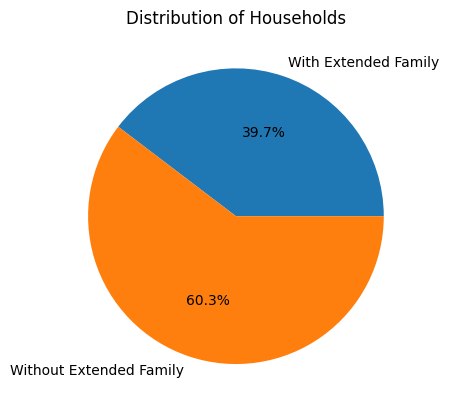

In [ ]:
import matplotlib.pyplot as plt

house_with_ext = (final_sample['Do you live with an extended family (with grandmother/aunt/and such)?'] == 'Yes').sum()
house_without_ext= (final_sample['Do you live with an extended family (with grandmother/aunt/and such)?'] == 'No').sum()

plt.pie([house_with_ext, house_without_ext], labels=['With Extended Family', 'Without Extended Family'], autopct='%1.1f%%')
plt.title('Distribution of Households')
plt.show()

###4. Students at home

a. How many households have students?

In [ ]:
house_w_students=(final_sample['Are there students in your household?'] == 'Yes').sum()
house_wout_students=(final_sample['Are there students in your household?'] == 'No').sum()
print(house_w_students)
print(house_wout_students)

57
1


b. Make a pie chart from it.

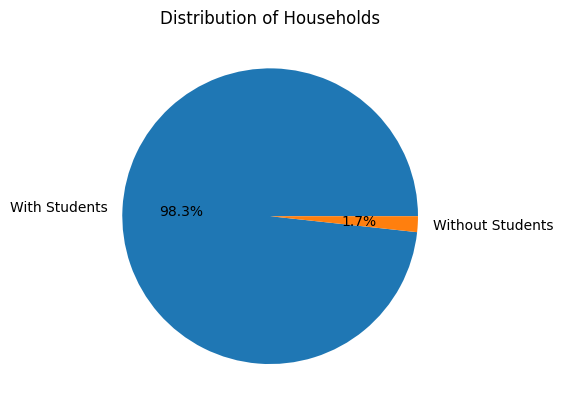

In [ ]:
plt.pie([house_w_students, house_wout_students], labels=['With Students', 'Without Students'], autopct='%1.1f%%')
plt.title('Distribution of Households')
plt.show()

###5. AVERAGE BILL / AVERAGE BUDGET

a. How much is the average bill of the low income households? call the variable 'avg_bill_household'

In [ ]:
avg_bill_household=final_sample.avg_bill.mean()
avg_bill_household

np.float64(3498.948275862069)

b. How much is the average budget of the low income households? Call the variable 'avg_budget_household'.

In [ ]:
avg_budget_household=final_sample['How much is your household’s budget for electricity each month?'].mean()


In [ ]:
avg_budget_household

np.float64(2327.0862068965516)

c. Based on the numbers, what can you conclude?

ANSWER HERE:

The average electricity bill of the low income households is 3498.95.<br>
The average budget of the low income households is 2327.08.


###6. AVERAGE BILL with students

a. What is the average bill of households with students at home? Use .groupby

```
# sample code from previous lecture

df[['Education',"Income"]].groupby("Education").mean()
```



In [ ]:
final_sample.groupby('Are there students in your household?')['avg_bill'].mean()


,avg_bill
Are there students in your household?,
No,1252.000000
Yes,3538.368421


b. What can you conclude from the information above? Note: This is a trick question.

ANSWER HERE:

The average bill of households with students at home is 3538.36.

###7. Struggle to find money.

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```



In [ ]:
struggle=final_sample['Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]'].value_counts().reset_index()
struggle


,Choose among the following: [How often do you struggle in finding money to pay for the electric bill?],count
0,Sometimes,26
1,Always,11
2,Often,10
3,Very Often,8
4,Never,3


b. Make a bar chart

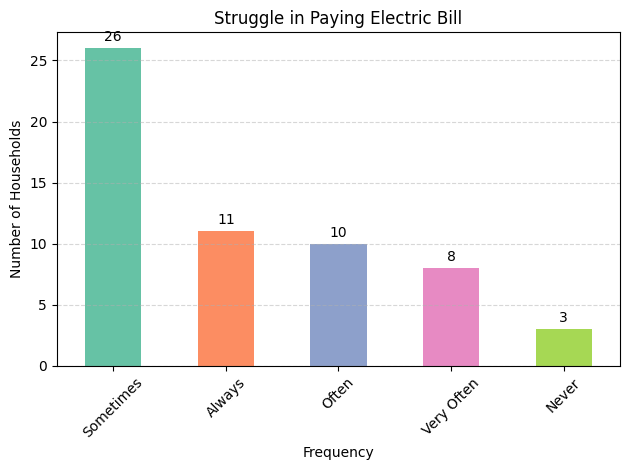

In [ ]:

chart = struggle.plot(
    kind='bar',
    y='count',
    x='Choose among the following: [How often do you struggle in finding money to pay for the electric bill?]',
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'],
    legend=False
)

chart.set_xlabel('Frequency')
chart.set_ylabel('Number of Households')
chart.set_title('Struggle in Paying Electric Bill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in chart.patches:
    height = bar.get_height()
    chart.annotate(f'{int(height)}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

plt.show()



###8. Fail to pay the bill

a. How many households struggle to pay the bill always, very often, often, sometimes, and never?



```
.value_counts()
```


In [ ]:
fail_to_pay=final_sample['Choose among the following: [How often do you fail to pay the monthly electric bill?]'].value_counts().reset_index()
fail_to_pay

,Choose among the following: [How often do you fail to pay the monthly electric bill?],count
0,Sometimes,31
1,Never,12
2,Often,9
3,Very Often,4
4,Always,2


b. Make a bar chart

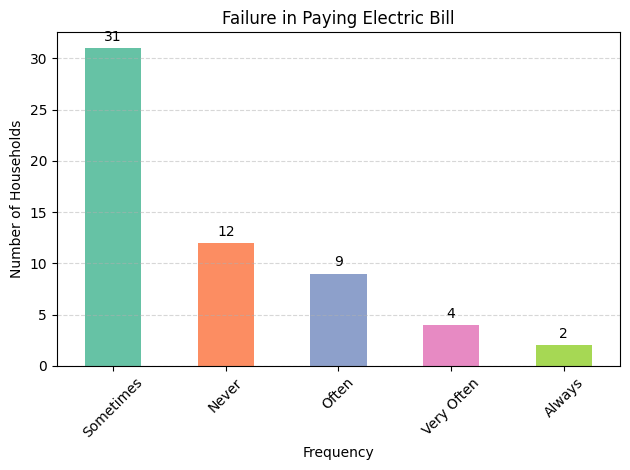

In [ ]:

chart = fail_to_pay.plot(
    kind='bar',
    y='count',
    x='Choose among the following: [How often do you fail to pay the monthly electric bill?]',
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'],
    legend=False
)

chart.set_xlabel('Frequency')
chart.set_ylabel('Number of Households')
chart.set_title('Failure in Paying Electric Bill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in chart.patches:
    height = bar.get_height()
    chart.annotate(f'{int(height)}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

plt.show()


###9. You now may use SQL, or Python, whichever is more comfortable.

if you will use SQL, make sure to reconnect to the database THAT IS already in our directory. Careful with the spelling.


a. Count how many households have each of the essential appliances.

1. TV
2. Refrigerator
3. Rice Cooker
4. Washing Machine

<br>

also count how many households got the luxury of having these appliances.

1. Electric Water Dispenser
2. Air Conditioner

In [ ]:
essential_appliances = ['TV', 'Refrigerator', 'Rice Cooker', 'Washing Machine','Electric Water Dispenser',
'Air Conditioner']

appliance_counts = pd.DataFrame()

for appliance in essential_appliances:
    appliance_counts[appliance] = final_sample['Please tick if you own these appliances (choose all possible)'].str.contains(appliance, case=False, na=False)

ownership_counts = appliance_counts.sum().reset_index()
ownership_counts.columns = ['Appliance', 'Count']

ownership_counts


,Appliance,Count
0,TV,55
1,Refrigerator,42
2,Rice Cooker,33
3,Washing Machine,51
4,Electric Water Dispenser,8
5,Air Conditioner,22


In [ ]:
conn=sqlite3.connect('Survey_Database.db')
final_sample.to_sql('final_sample',conn,if_exists='replace',index=False)

58

In [ ]:
q14='''SELECT 'TV' AS Appliance, COUNT(*) AS Count
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%tv%'

UNION ALL

SELECT 'Refrigerator', COUNT(*)
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%refrigerator%'

UNION ALL

SELECT 'Rice Cooker', COUNT(*)
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%rice cooker%'

UNION ALL

SELECT 'Washing Machine', COUNT(*)
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%washing machine%'

UNION ALL

SELECT 'Electric Water Dispenser', COUNT(*)
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%electric water dispenser%'

UNION ALL

SELECT 'Air Conditioner', COUNT(*)
FROM final_sample
WHERE LOWER([Please tick if you own these appliances (choose all possible)]) LIKE '%air conditioner%';'''
appliance_count=pd.read_sql_query(q14,conn)
appliance_count


,Appliance,Count
0,TV,55
1,Refrigerator,42
2,Rice Cooker,33
3,Washing Machine,51
4,Electric Water Dispenser,8
5,Air Conditioner,22


###10. Remember the With_Students table? Now get the number of the students in low income households who has at least a laptop or desktop computer.

In [ ]:
q141='''SELECT name FROM sqlite_master WHERE type='table' '''
pd.read_sql_query(q141,conn)

,name
0,Main_Table
1,With_Students
2,sample
3,final_sample


In [ ]:
q15='''SELECT COUNT(*) AS Count
FROM With_Students
WHERE "Are there students in your household?" = 'Yes'
AND "Please tick if you own these appliances (choose all possible)" LIKE '%Laptop%' OR "Please tick if you own these appliances (choose all possible)" LIKE '%Desktop%';'''
pd.read_sql_query(q15,conn)


,Count
0,45
